In [1]:
# Finding the correlation between Women, Major Category and Employement Rate
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read data into a DataFrame
data = pd.read_csv('data/recent-grads.csv', index_col=0)
data.head()

,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,,,,,,,,,,,,,,,,,,,,
1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


/Users/snasar/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


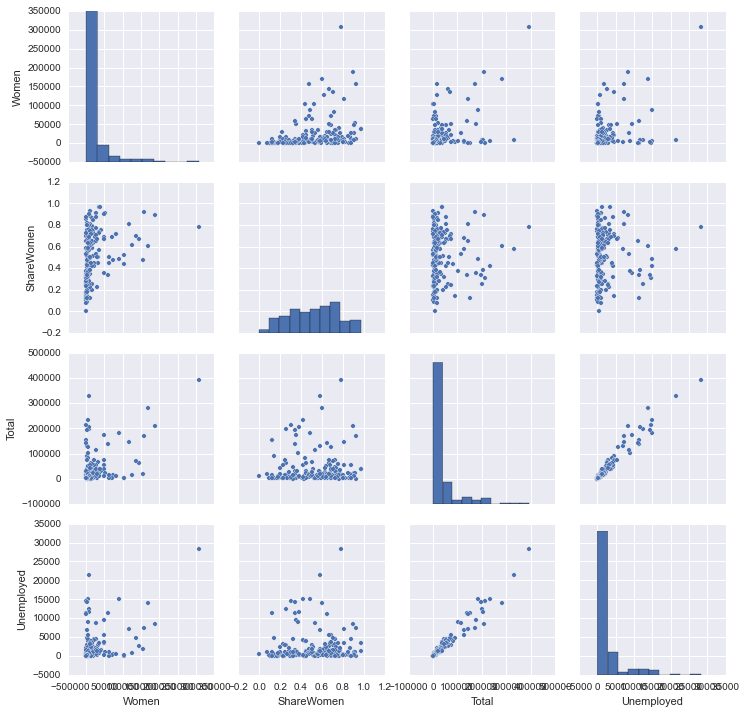

In [3]:
# scatter plot in Seaborn
# sns.pairplot(data, x_vars=['Women','ShareWomen','Total'], y_vars='Unemployment_rate', size=6, aspect=0.7)

sns.pairplot(data[['Women','ShareWomen','Total', 'Unemployed']])

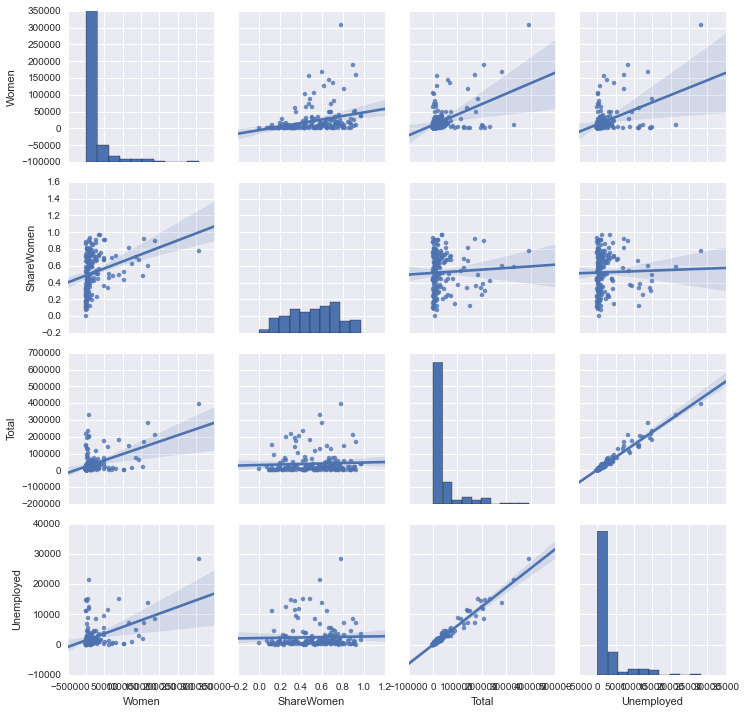

In [4]:
# include a "regression line"
# sns.pairplot(data, x_vars=['Women','ShareWomen','Total'], y_vars='Unemployement_rate', size=6, aspect=0.7, kind='reg')

sns.pairplot(data[['Women','ShareWomen','Total', 'Unemployed']], kind='reg')

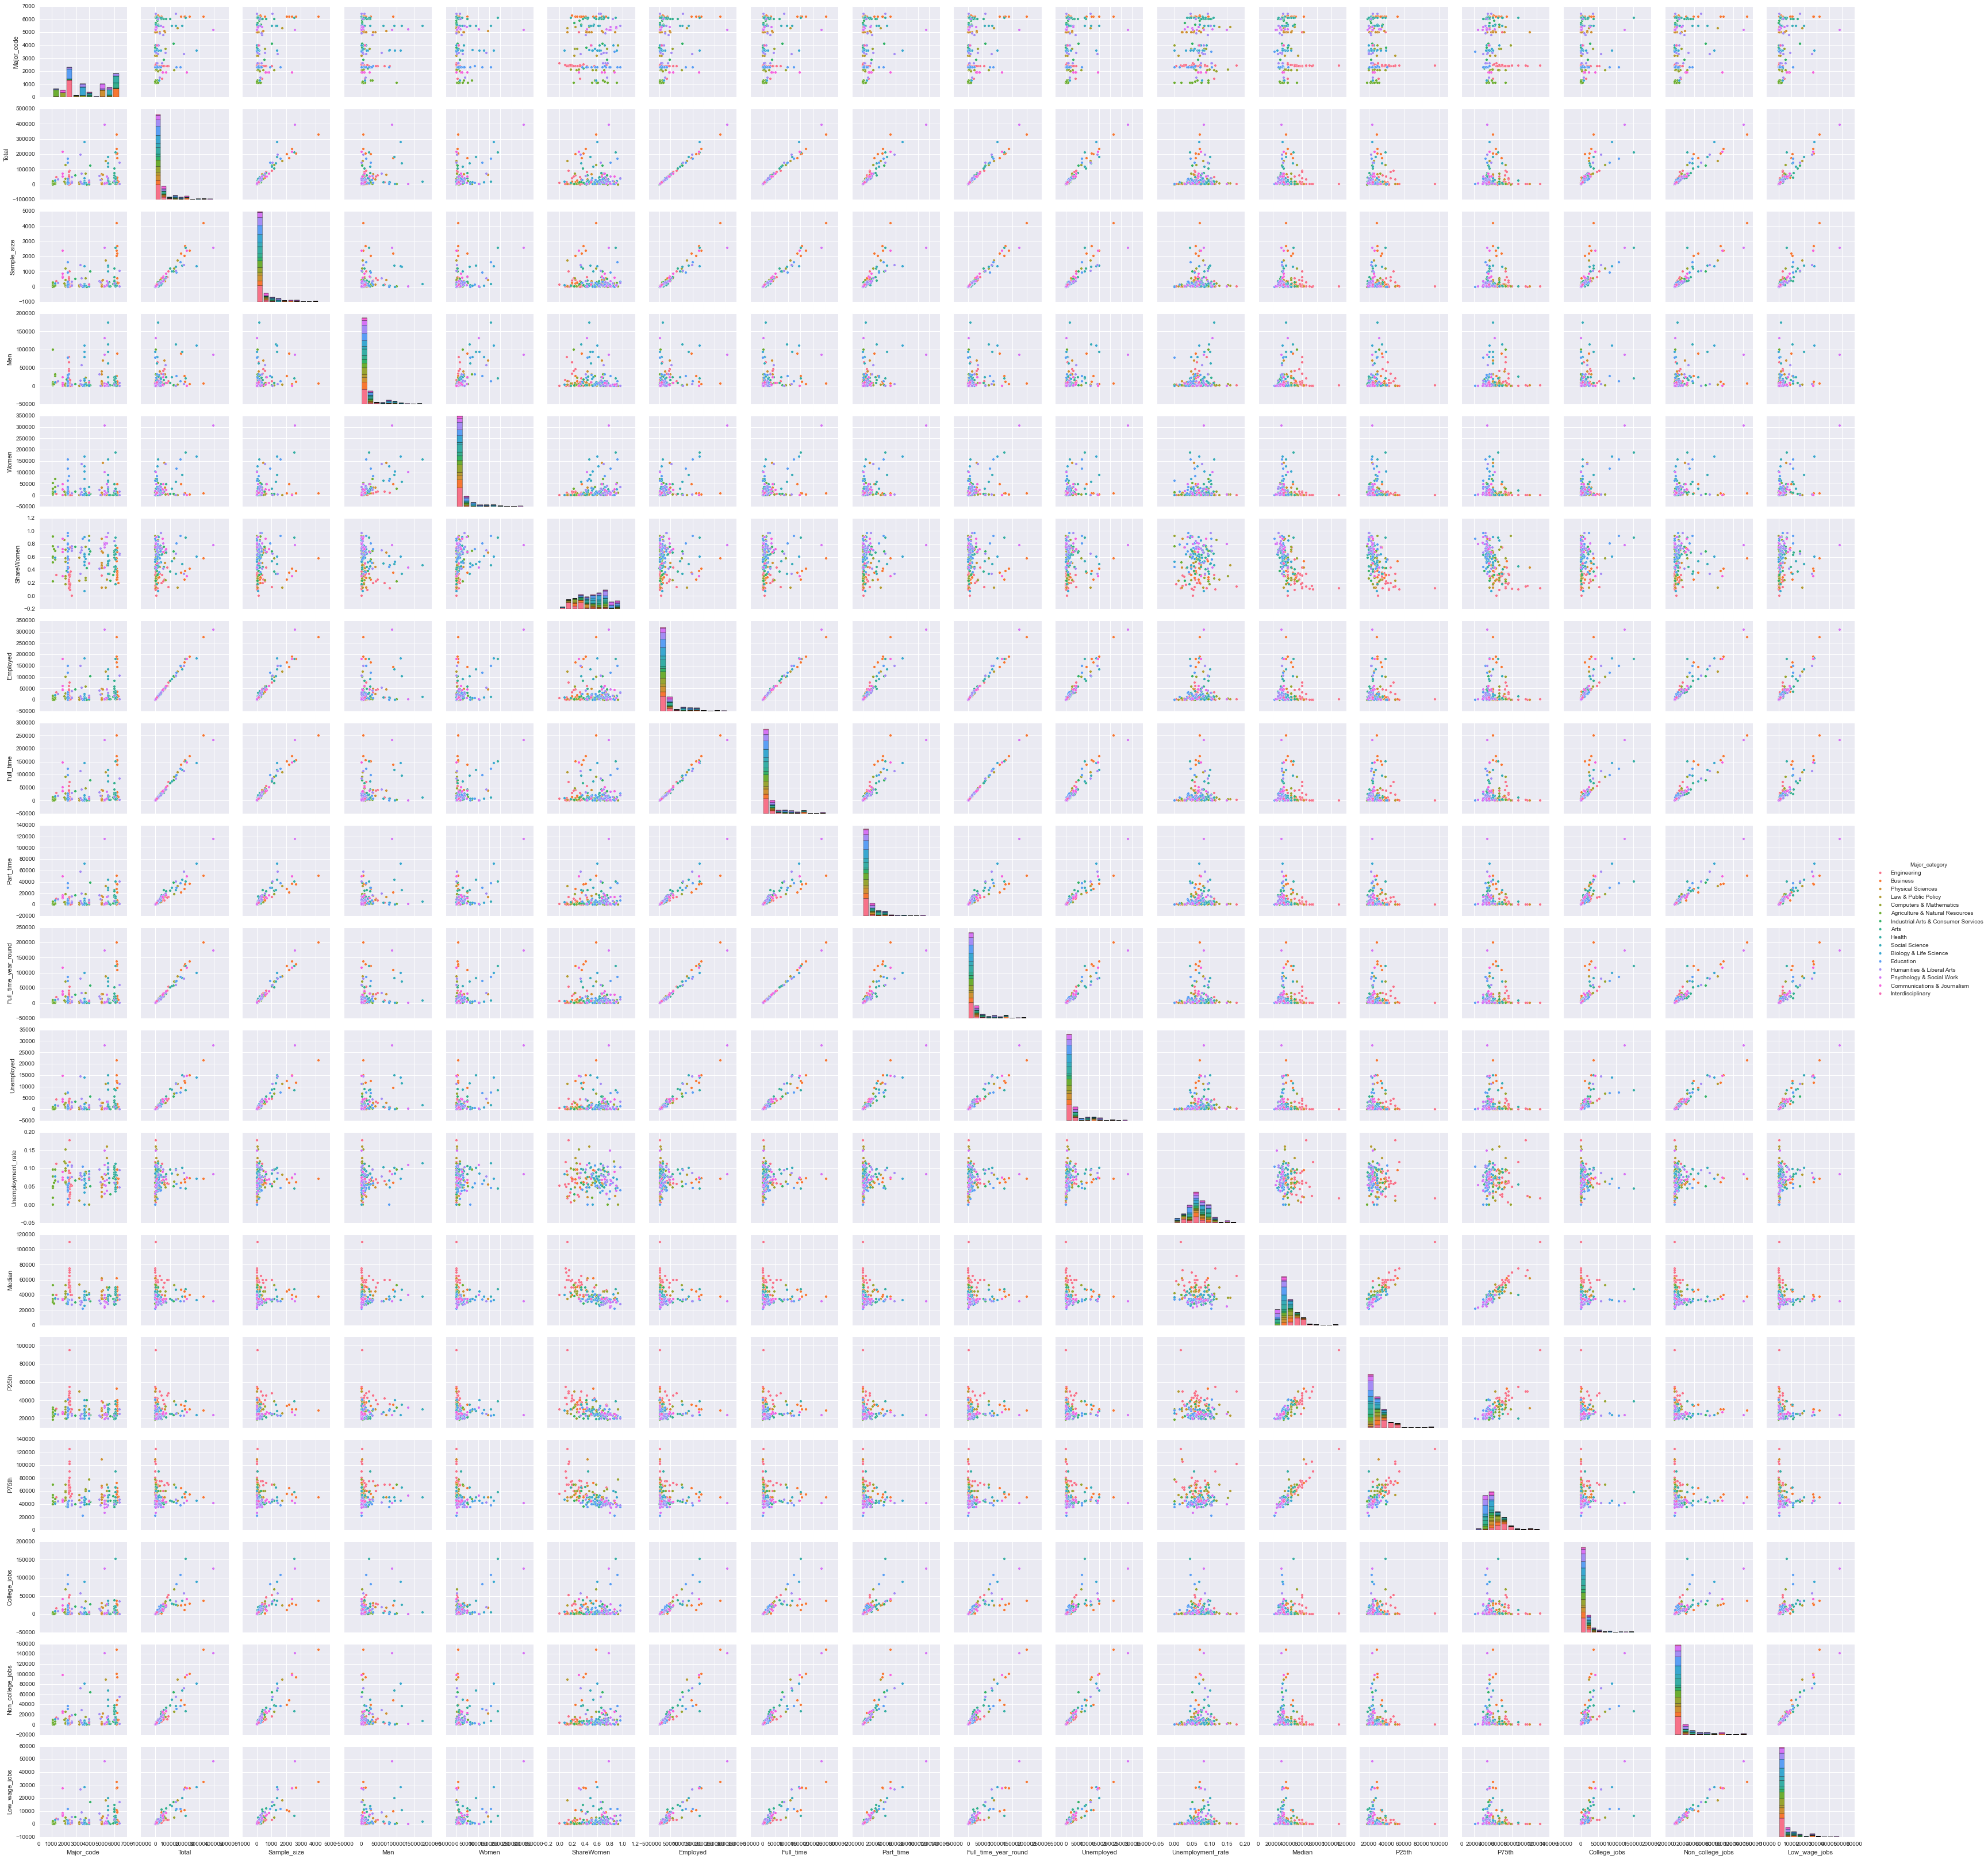

In [ ]:
sns.pairplot(data, hue="Major_category")

In [9]:
# sns.pairplot(data, hue="Major_category", palette="husl")

In [10]:
# sns.pairplot[data[data['Major_category'].isin(['Engineering', 'Arts', 'Physical Sciences'])]]

In [4]:
data['Major_category']

Rank
1                              Engineering
2                              Engineering
3                              Engineering
4                              Engineering
5                              Engineering
6                              Engineering
7                                 Business
8                        Physical Sciences
9                              Engineering
10                             Engineering
11                             Engineering
12                             Engineering
13                             Engineering
14                             Engineering
15                             Engineering
16                             Engineering
17                             Engineering
18                             Engineering
19                             Engineering
20                     Law & Public Policy
21                 Computers & Mathematics
22         Agriculture & Natural Resources
23                             Engineering
24    

In [5]:
categories = ['Engineering', 'Education', 'Arts', 'Physical Sciences']
category_mask = data['Major_category'].isin(categories)
data[category_mask]

,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,,,,,,,,,,,,,,,,,,,,
1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
6,2418,NUCLEAR ENGINEERING,Engineering,2573,17,2200,373,0.144967,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244
8,5001,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,1792,10,2110,1667,0.441356,1526,1085,553,827,33,0.021167,62000,31500,109000,972,500,220
9,2414,MECHANICAL ENGINEERING,Engineering,91227,1029,12953,2105,0.139793,76442,71298,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
10,2408,ELECTRICAL ENGINEERING,Engineering,81527,631,8407,6548,0.437847,61928,55450,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


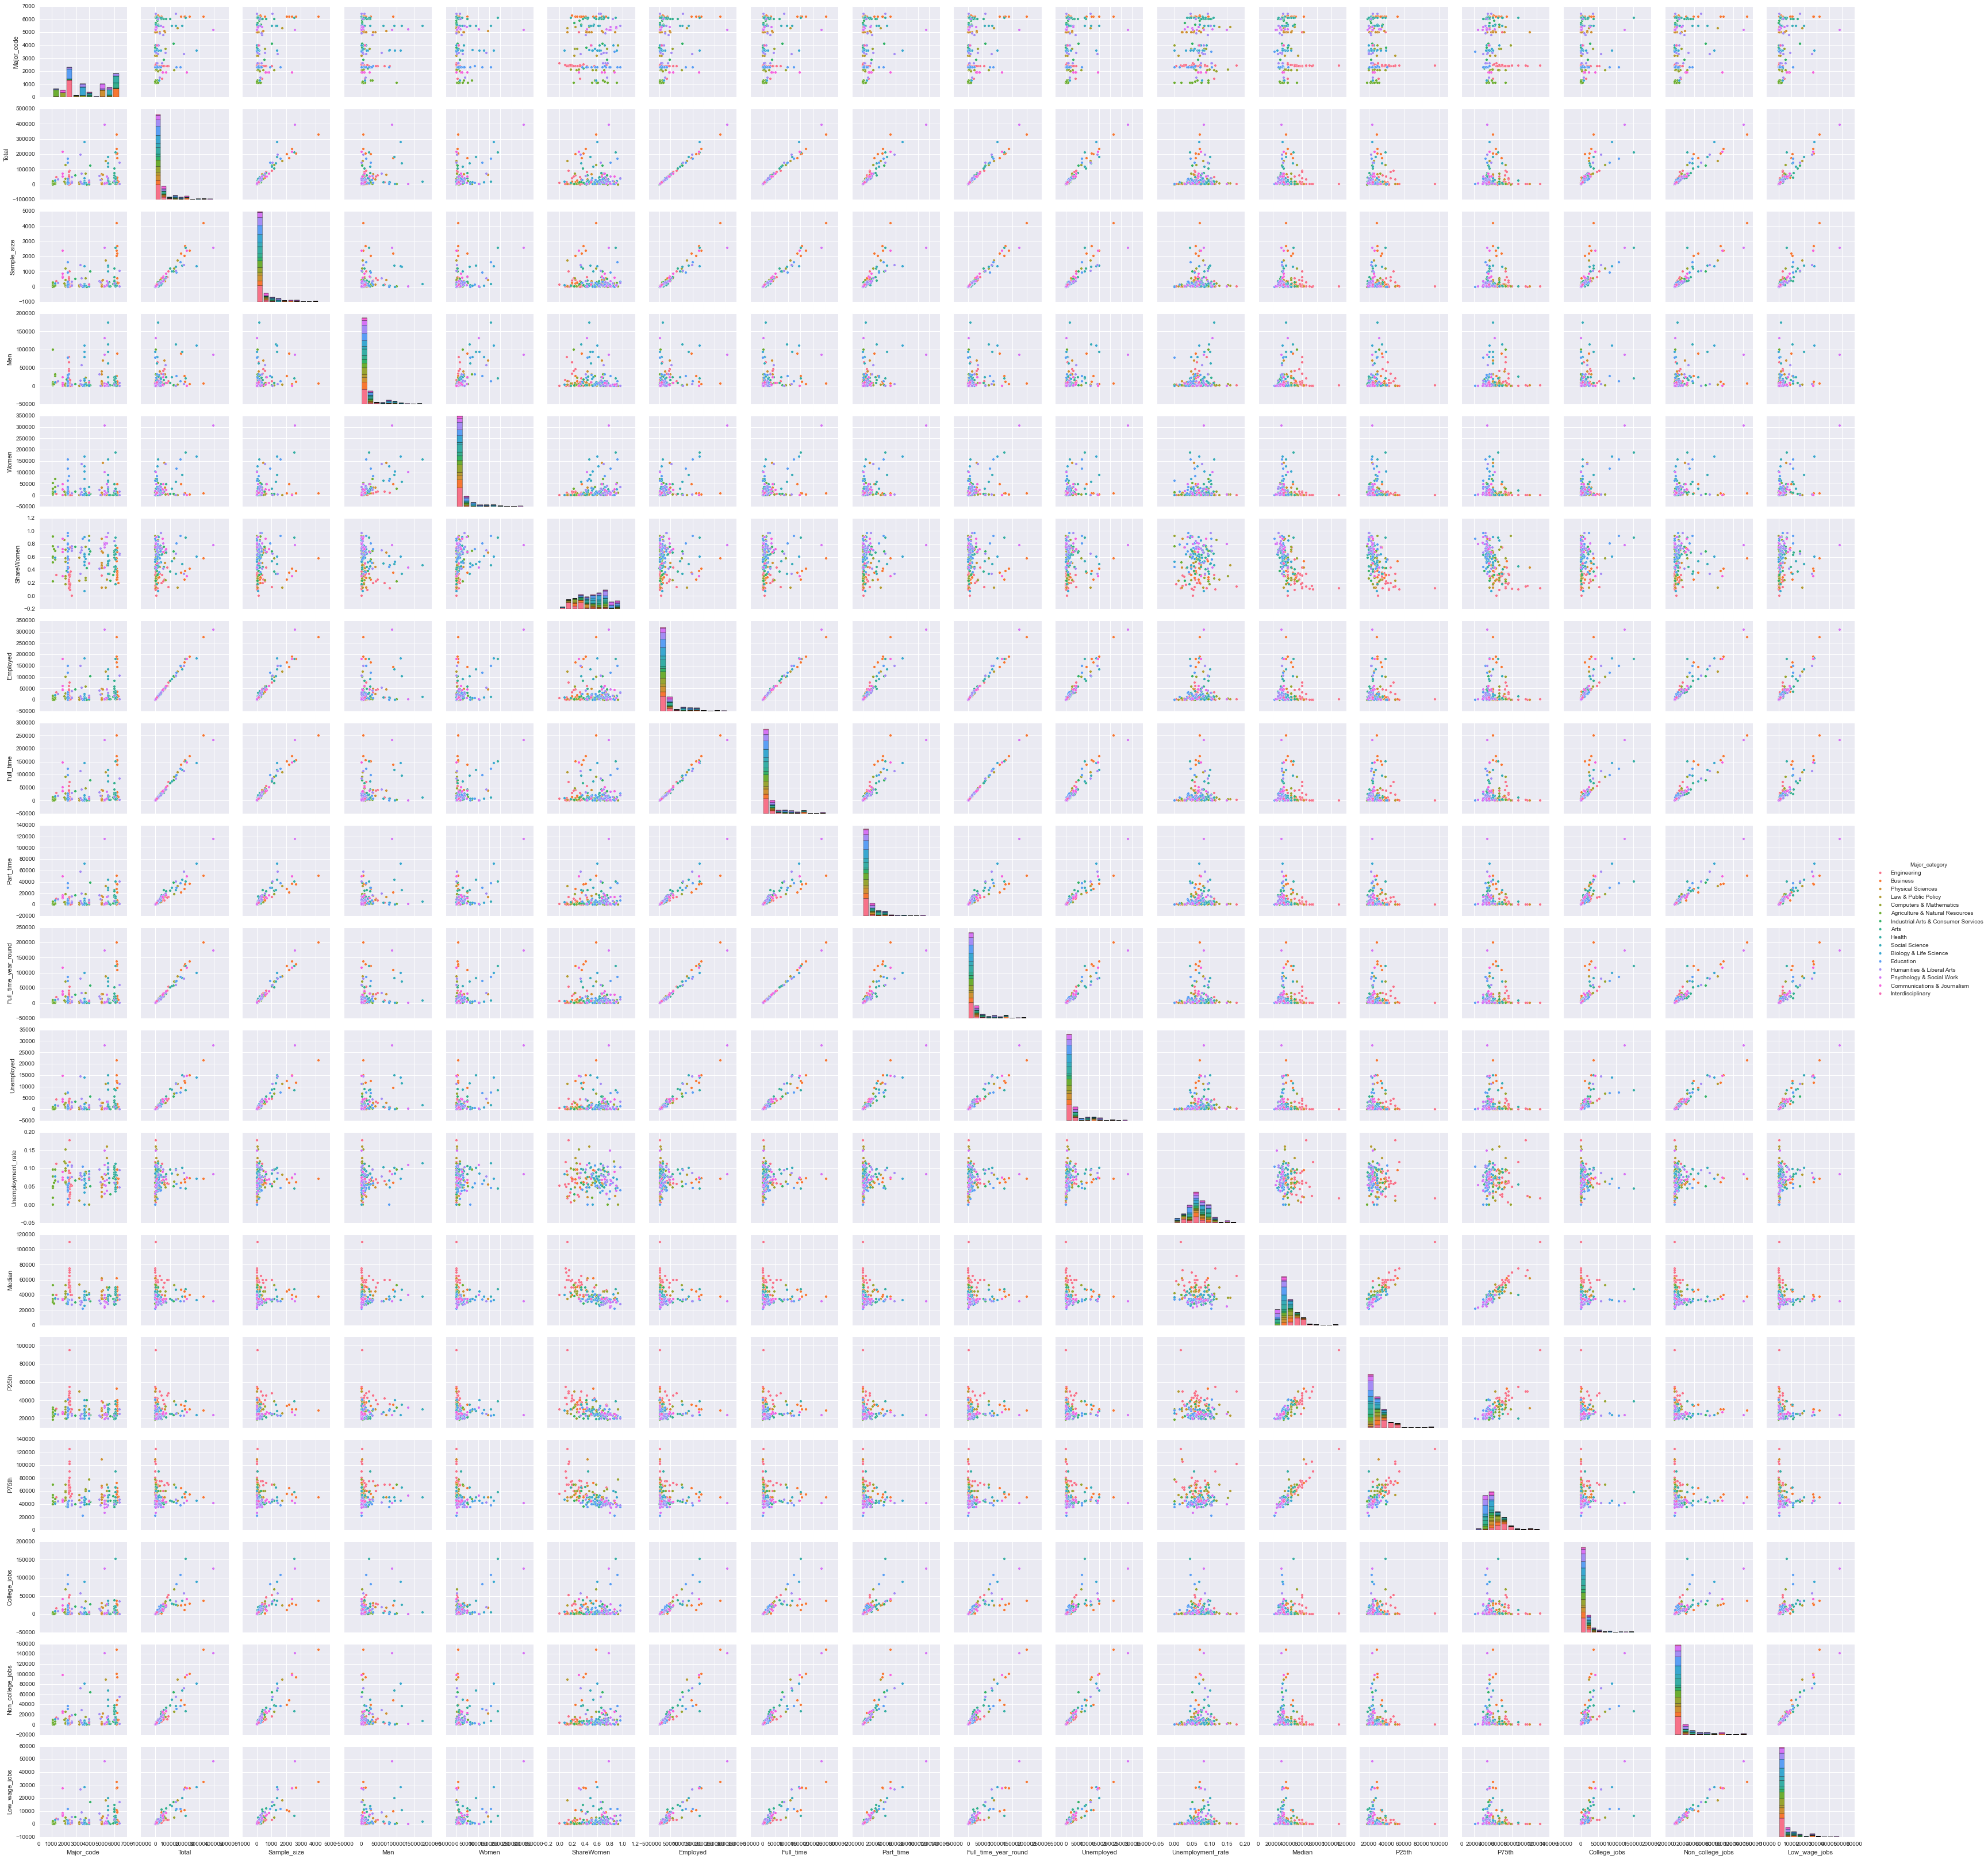

In [38]:
sns.pairplot(data, hue="Major_category")

**Correlation Matrix**

Find the correlation by using a correlation matrix to visualize the correlation between all numerical variables.


In [6]:
# compute correlation matrix
data.corr()

,Major_code,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Major_code,1.000000,0.200333,0.206580,0.036930,0.048456,0.073490,0.200925,0.199397,0.195184,0.205634,0.223418,0.127894,-0.176072,-0.166864,-0.094556,0.041198,0.232425,0.225294
Total,0.200333,1.000000,0.945662,0.262871,0.481571,0.053814,0.996221,0.989358,0.950351,0.981145,0.974804,0.072919,-0.109850,-0.072723,-0.086737,0.800798,0.941337,0.935599
Sample_size,0.206580,0.945662,1.000000,0.174730,0.342827,0.013510,0.964462,0.978396,0.824824,0.985235,0.918059,0.053229,-0.067578,-0.025229,-0.055737,0.701704,0.915464,0.860319
Men,0.036930,0.262871,0.174730,1.000000,0.673249,-0.112655,0.234249,0.232432,0.269294,0.218846,0.266298,0.138844,0.022419,0.045062,0.032647,0.215923,0.187386,0.214532
Women,0.048456,0.481571,0.342827,0.673249,1.000000,0.296876,0.463872,0.428955,0.554862,0.409465,0.439950,0.042954,-0.185242,-0.118780,-0.168943,0.611389,0.359267,0.423866
ShareWomen,0.073490,0.053814,0.013510,-0.112655,0.296876,1.000000,0.056304,0.033038,0.114114,0.024042,0.028328,-0.034517,-0.614711,-0.527633,-0.553608,0.151148,0.041714,0.076406
Employed,0.200925,0.996221,0.964462,0.234249,0.463872,0.056304,1.000000,0.995838,0.934528,0.991047,0.968900,0.060937,-0.107547,-0.067514,-0.087560,0.797534,0.941326,0.927224
Full_time,0.199397,0.989358,0.978396,0.232432,0.428955,0.033038,0.995838,1.000000,0.900877,0.998203,0.960102,0.056298,-0.082258,-0.042957,-0.065073,0.772515,0.933124,0.904852
Part_time,0.195184,0.950351,0.824824,0.269294,0.554862,0.114114,0.934528,0.900877,1.000000,0.880855,0.945094,0.102653,-0.190124,-0.153509,-0.158220,0.804987,0.909634,0.951593
Full_time_year_round,0.205634,0.981145,0.985235,0.218846,0.409465,0.024042,0.991047,0.998203,0.880855,1.000000,0.950711,0.050205,-0.072982,-0.033034,-0.056932,0.755254,0.928874,0.892847


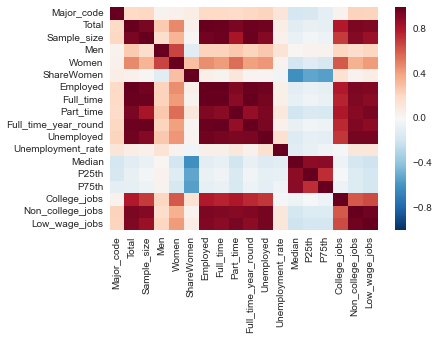

In [40]:
# display correlation matrix in Seaborn using a heatmap
sns.heatmap(data.corr())

**Simple linear regression**

Simple linear regression is an approach for predicting a continuous response using a single feature. It takes the following form:

**y=β0+β1x**

y is the response
x is the feature
β0 is the intercept
β1 is the coefficient for x
β0 and β1 are called the model coefficients:
We must "learn" the values of these coefficients to create our model.
And once we've learned these coefficients, we can use the model to predict Sales.

In [7]:
data

,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,,,,,,,,,,,,,,,,,,,,
1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
6,2418,NUCLEAR ENGINEERING,Engineering,2573,17,2200,373,0.144967,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244
7,6202,ACTUARIAL SCIENCE,Business,3777,51,832,960,0.535714,2912,2924,296,2482,308,0.095652,62000,53000,72000,1768,314,259
8,5001,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,1792,10,2110,1667,0.441356,1526,1085,553,827,33,0.021167,62000,31500,109000,972,500,220
9,2414,MECHANICAL ENGINEERING,Engineering,91227,1029,12953,2105,0.139793,76442,71298,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253


In [12]:
### STATSMODELS ###

# create a fitted model
lm = smf.ols(formula='Unemployment_rate ~ Women', data=data).fit()

# print the coefficients
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Unemployment_rate   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3142
Date:                Mon, 30 Nov 2015   Prob (F-statistic):              0.576
Time:                        21:14:23   Log-Likelihood:                 359.92
No. Observations:                 172   AIC:                            -715.8
Df Residuals:                     170   BIC:                            -709.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0679      0.003     25.939      0.000         0.063     0.073
Women       3.135e-08   5.59e-08      0.561      0.576     -7.91e-08  1.42e-07
==============================================================================
Omnibus:                        9.050   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               11.400
Skew:                           0.359   Prob(JB):                      0.00335
Kurtosis:                       4.037   Cond. No.                     5.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['Unemployment_rate']
X = data[feature_cols]
y = data.ShareWomen
.
# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_

SyntaxError: invalid syntax (<ipython-input-5-d0c43d7b2527>, line 7)